In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostRegressor


In [2]:
car = pd.read_csv('car-mpg.csv')

car.fillna(car.mean(), inplace=True)

x = car.drop(['MPG','Make'], axis=1)

le1 = LabelEncoder()
x['DriveTrain'] = le1.fit_transform(x['DriveTrain'])

y = car['MPG']

C:\Users\porpu\AppData\Local\Temp\ipykernel_26732\2291179236.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  car.fillna(car.mean(), inplace=True)


In [3]:
x.head(10)

,DriveTrain,EngineSize,Cylinders,Horsepower,Weight,Wheelbase,Length
0,0,3.5,6.0,265,4451,106,189
1,1,2.0,4.0,200,2778,101,172
2,1,2.4,4.0,200,3230,105,183
3,1,3.2,6.0,270,3575,108,186
4,1,3.5,6.0,225,3880,115,197
5,1,3.5,6.0,225,3893,115,197
6,2,3.2,6.0,290,3153,100,174
7,1,1.8,4.0,170,3252,104,179
8,1,1.8,4.0,170,3638,105,180
9,1,3.0,6.0,220,3462,104,179


In [4]:
regi = CatBoostRegressor(iterations=1500, depth=9,learning_rate=0.04627823525262093, loss_function='RMSE')
regi.fit(x, y)

0:	learn: 5.0928872	total: 143ms	remaining: 3m 34s
1:	learn: 4.9551111	total: 147ms	remaining: 1m 49s
2:	learn: 4.8320035	total: 160ms	remaining: 1m 19s
3:	learn: 4.7087110	total: 176ms	remaining: 1m 5s
4:	learn: 4.5900129	total: 199ms	remaining: 59.5s
5:	learn: 4.4731319	total: 214ms	remaining: 53.4s
6:	learn: 4.3665210	total: 226ms	remaining: 48.2s
7:	learn: 4.2639627	total: 238ms	remaining: 44.4s
8:	learn: 4.1664114	total: 252ms	remaining: 41.8s
9:	learn: 4.0695162	total: 264ms	remaining: 39.3s
10:	learn: 3.9852491	total: 276ms	remaining: 37.4s
11:	learn: 3.8918153	total: 288ms	remaining: 35.7s
12:	learn: 3.8173507	total: 289ms	remaining: 33.1s
13:	learn: 3.7365059	total: 302ms	remaining: 32s
14:	learn: 3.6541735	total: 304ms	remaining: 30.1s
15:	learn: 3.5840589	total: 317ms	remaining: 29.4s
16:	learn: 3.5180134	total: 333ms	remaining: 29s
17:	learn: 3.4445898	total: 343ms	remaining: 28.2s
18:	learn: 3.3760407	total: 354ms	remaining: 27.6s
19:	learn: 3.3142332	total: 366ms	remainin

In [5]:
score = regi.score(x, y)
score

# Depth10 0.9998237735937868
# Depth 9 0.9997110612021696
# Depth 8 0.9995618902824073
# Depth 7 0.999142521166676
# Depth 6 0.9985843864307066
# Depth 5 0.9971576029475289
# Depth 4 0.994552391338996
# Depth 3 0.9883372151573528
# Depth 2 0.9769993708460384
# Depth 1 0.9122858318572236

0.9998237735937868

In [6]:
regi.predict([[1, 2.8, 4, 150, 2500, 108, 172]])

array([25.36233363])

DriveTrain 9.028595288698304
EngineSize 20.91998837798203
Cylinders 7.494531437524102
Horsepower 30.519946262837223
Weight 16.583508539735423
Wheelbase 7.953934026937084
Length 7.499496066285835


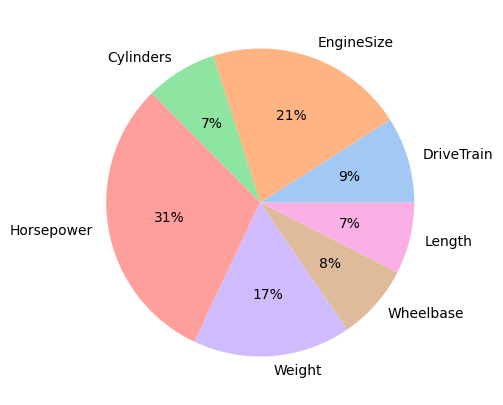

In [7]:
ftip = regi.feature_importances_

plt.figure(figsize=(5,5))

colors = sns.color_palette('pastel')[0:7]
plt.pie(x=ftip, labels=x.columns, colors = colors, autopct='%.0f%%')

for i in range(0, len(ftip)):
    print(x.columns[i], ftip[i])

plt.show()



## รถล้อหน้า เครื่องยนต์ความจุ 2.8 ลิตร 4 สูบ 150 แรงม้า น้ําหนัก 2500 กก. ความยาวฐานล้อ 108 ความยาวตัวรถ 172  
# มีอัตราการกินน้ำมันประมาณ 24.92179991 MPG

## วิเคราะห์ผลที่ได้รวมถึงน้ําหนักของแต่ละปัจจัยที่ใช้ด้วย
### ปัจจัยที่ใช้ในการวิเคราะห์
### โดยมีอัตราส่วนที่ส่งผลให้อัตราการกินน้ำมันมากขึ้นจากมากไปน้อยดังนี้
### 1. แรงม้า 2. น้ำหนัก 3. เครื่องยนต์ความจุ 4. ความยาวตัวรถ 5. เคลื่อนที่ 6. ลูกสูบ 7. ความยาวฐานล้อ
